# Basic ML Project Using Logistic Regression Model

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("placement.csv")

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


## Pre-Processing

In [9]:
df.info() #No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
df.shape  #100 rows and 4 colm

(100, 4)

In [7]:
df=df.iloc[:,1:]

In [10]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


## EDA

In [12]:
import matplotlib.pyplot as plt

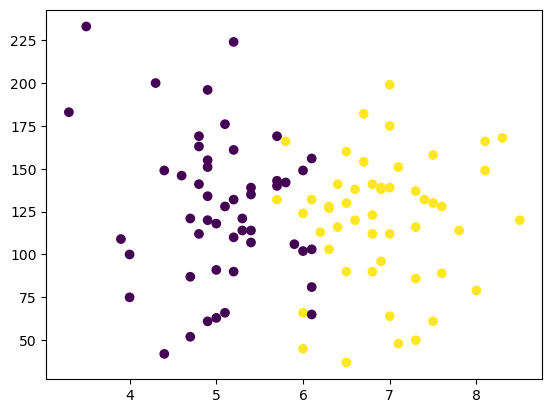

In [55]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [56]:
#Breaking tha dataset into parts
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]

In [24]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [25]:
Y.shape

(100,)

In [27]:
#Train-Test divide

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [28]:
X_train

,cgpa,iq
0,6.8,123.0
92,5.2,110.0
54,6.4,141.0
96,4.4,42.0
13,6.4,116.0
...,...,...
84,5.7,169.0
90,7.3,86.0
36,5.7,140.0
12,5.4,139.0


In [29]:
Y_train

0     1
92    0
54    1
96    0
13    1
     ..
84    0
90    1
36    0
12    0
82    1
Name: placement, Length: 90, dtype: int64

In [31]:
#Scale the value
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()

In [33]:
X_train=scaler.fit_transform(X_train)

In [34]:
X_train

array([[ 0.71244114,  0.04241637],
       [-0.70652877, -0.29983985],
       [ 0.35769866,  0.51630959],
       [-1.41601372, -2.09010312],
       [ 0.35769866, -0.14187544],
       [ 0.09164181,  0.9112206 ],
       [-0.52915753,  0.35834518],
       [-0.52915753, -0.37882205],
       [-0.79521439,  0.17405337],
       [-1.7707562 , -0.56311386],
       [ 0.71244114, -0.24718504],
       [ 0.09164181, -0.48413165],
       [ 0.00295619, -1.45824549],
       [ 1.24455486,  0.27936298],
       [ 1.33324048,  0.22670818],
       [-1.14995686, -0.01023843],
       [ 0.62375552,  0.8585658 ],
       [-0.97258563, -1.5898825 ],
       [ 1.86535419,  1.17449461],
       [ 0.80112676,  0.46365478],
       [ 1.15586924,  0.41099998],
       [ 1.4219261 ,  0.17405337],
       [-1.85944182, -0.32616725],
       [ 0.44638428, -0.82638787],
       [-0.97258563, -0.03656583],
       [-0.70652877,  1.04285761],
       [ 0.26901305,  0.17405337],
       [ 0.80112676, -0.66842346],
       [-0.70652877,

In [35]:
X_test=scaler.transform(X_test)

In [36]:
X_test

array([[-2.2141843 ,  2.93843048],
       [ 0.09164181, -1.48457289],
       [ 0.5350699 ,  0.43732738],
       [ 1.59929734, -0.19453024],
       [-0.70652877,  2.70148387],
       [-0.61784315, -0.01023843],
       [ 0.978498  ,  0.7795836 ],
       [ 0.80112676,  0.43732738],
       [-1.23864248,  0.64794659],
       [ 0.26901305, -0.48413165]])

In [38]:
#Logistic regression 

from sklearn.linear_model import LogisticRegression

In [39]:
clf=LogisticRegression()

In [40]:
#Model training
clf.fit(X_train,Y_train)

LogisticRegression()

In [44]:
#Evaluate the model
Y_pred=clf.predict(X_test)

In [46]:
Y_pred

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [42]:
Y_test

50    0
56    0
48    1
55    1
16    0
2     0
21    1
11    1
39    0
98    1
Name: placement, dtype: int64

In [57]:
#Accuracy

from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(Y_test,Y_pred)

0.9

#### Here we state that the model is 90% Accurate.

In [50]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.4/1.4 MB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [51]:
#Decision Boundary
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

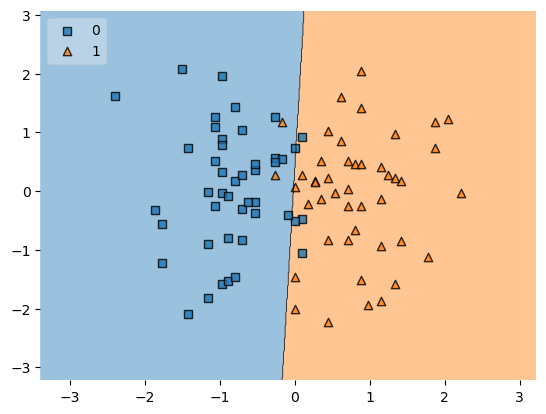

In [52]:
plot_decision_regions(X_train,Y_train.values,clf=clf,legend=2)